<a href="https://colab.research.google.com/github/taskswithcode/MLIntro/blob/main/EntropyInPhysicsAndInformationTheory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the notebook for the video [Entropy in physics and information theory - demystified](https://youtu.be/F9YkjKoT2lw)

### Toy model to illustrate the difference between entropy in Physics and Information theory


#### 0. We will start with function definitions for the toy model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

def hypothetical_entropy(chamber):
    """Calculate the information theory entropy based on a hypothetical probability distribution."""
    total_particles = np.sum(chamber)
    max_particles_in_cell = np.max(chamber)

    # If any cell has all the particles, it's a highly surprising low-probability event
    if max_particles_in_cell == total_particles:
        probability = 0.01  # Assigning a low probability
    else:
        # If particles are dispersed, it's a less surprising high-probability event
        probability = 0.99  # Assigning a high probability
    print(f"Information theory - entropy probabilities: {probability}")
    return -probability * np.log2(probability)

In [ ]:
def gibbs_entropy(chamber):
    N = np.sum(chamber)
    probabilities = chamber.flatten() / N  # Probability of each cell
    print(f"Physics -  entropy probabilities: {probabilities}")
    non_zero_probs = probabilities[probabilities > 0]
    entropy = -np.sum(non_zero_probs * np.log(non_zero_probs))
    return entropy

In [ ]:

# Function to visualize the chamber and entropy values
def visualize_chamber(chamber, title):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Plot chamber
    cax = ax[0].matshow(chamber, cmap='viridis')
    plt.colorbar(cax, ax=ax[0])
    ax[0].set_title("Chamber State")
    for i in range(chamber.shape[0]):
        for j in range(chamber.shape[1]):
            ax[0].text(j, i, str(int(chamber[i, j])), ha='center', va='center', color='w')

    # Plot entropy values
    physics_ent = gibbs_entropy(chamber)
    info_theory_ent = hypothetical_entropy(chamber)
    ax[1].bar(['Physics Entropy', 'Info Theory Entropy'], [physics_ent, info_theory_ent], color=['blue', 'green'])
    ax[1].set_title("Entropy Values")
    ax[1].set_ylim(0, max(physics_ent, info_theory_ent) + 0.5)
    ax[1].text(0, physics_ent + 0.1, f"{physics_ent:.2f}", ha='center', va='bottom')
    ax[1].text(1, info_theory_ent + 0.1, f"{info_theory_ent:.2f}", ha='center', va='bottom')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [ ]:
def disperse(chamber):
    """Disperse gas particles in the chamber."""
    new_chamber = np.zeros((4, 4))
    for i in range(4):
        for j in range(4):
            valid_neighbors = [(di, dj) for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)] if 0 <= i+di < 4 and 0 <= j+dj < 4]
            total_divisions = len(valid_neighbors) + 1  # +1 for the original cell

            # Distribute to neighbors
            for di, dj in valid_neighbors:
                new_chamber[i+di, j+dj] += chamber[i, j] / total_divisions

            # Particles retained in the current cell
            new_chamber[i, j] += chamber[i, j] / total_divisions

    return new_chamber

#### 1. The initial state is a snapshot were 100 molecules are injected into the chamber and are all concentrated in the top right cell

In [ ]:
# Define the chamber and dispersion function
chamber = np.zeros((4, 4))
chamber[0, -1] = 100  # Initially, all gas particles are in the top-right square
print(f"total molecules in chamber:{np.sum(chamber):.0f}")

total molecules in chamber:100


####1a. Lets visualize the initial state and the entropy values

Physics -  entropy probabilities: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Information theory - entropy probabilities: 0.01


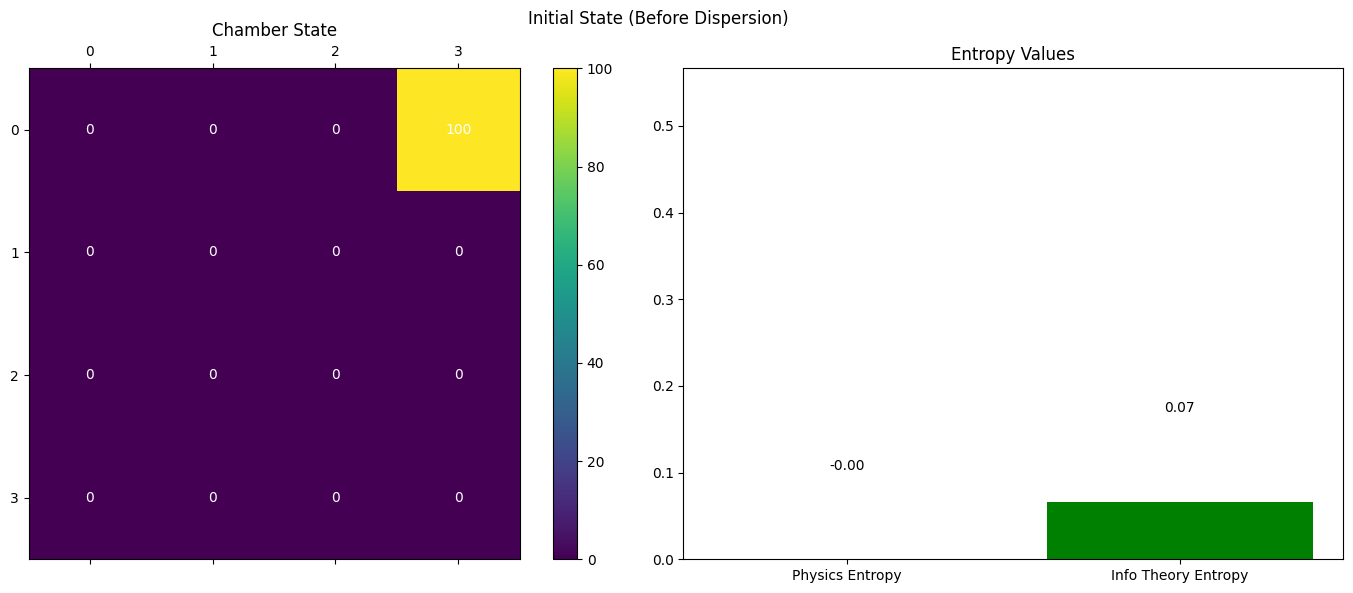

In [ ]:
visualize_chamber(chamber, "Initial State (Before Dispersion)")

**Left:** visualization of chamber. The numbers indicate how many molecules are in a call. There are 4x4 cells in all. All of  the 100 molecules are in top right initially. In the visualizations, the color represents the concentration of gas particles in each cell of the chamber.

Dark cells have fewer gas particles. Light yellow cell has more gas particles. In the initial state, all the gas particles are concentrated in one cell, so it is the lightest, while all other cells are dark. In the final state (shown below), the gas particles have dispersed, so the colors are more evenly distributed, reflecting that the gas particles are more evenly distributed throughout the chamber.

**Right:** *In the initial state of the chamber "Physics entropy" is **less** than "information theory  entropy"*

#### 2. The final state is a chamber with the gas molecules have dispersed into the chamber



In [ ]:
# Disperse the gas particles over multiple time steps
final_chamber = chamber.copy()
for _ in range(5):
    final_chamber = disperse(final_chamber)
print(f"total molecules in chamber:{np.sum(chamber):.0f}")

total molecules in chamber:100


#### 2a. Visualizing the dispersed state and the entropy values


Physics -  entropy probabilities: [0.03354167 0.07885494 0.14263683 0.13144547 0.02340741 0.06972685
 0.12860802 0.14263683 0.00877778 0.02605556 0.06972685 0.07885494
 0.         0.00877778 0.02340741 0.03354167]
Information theory - entropy probabilities: 0.99


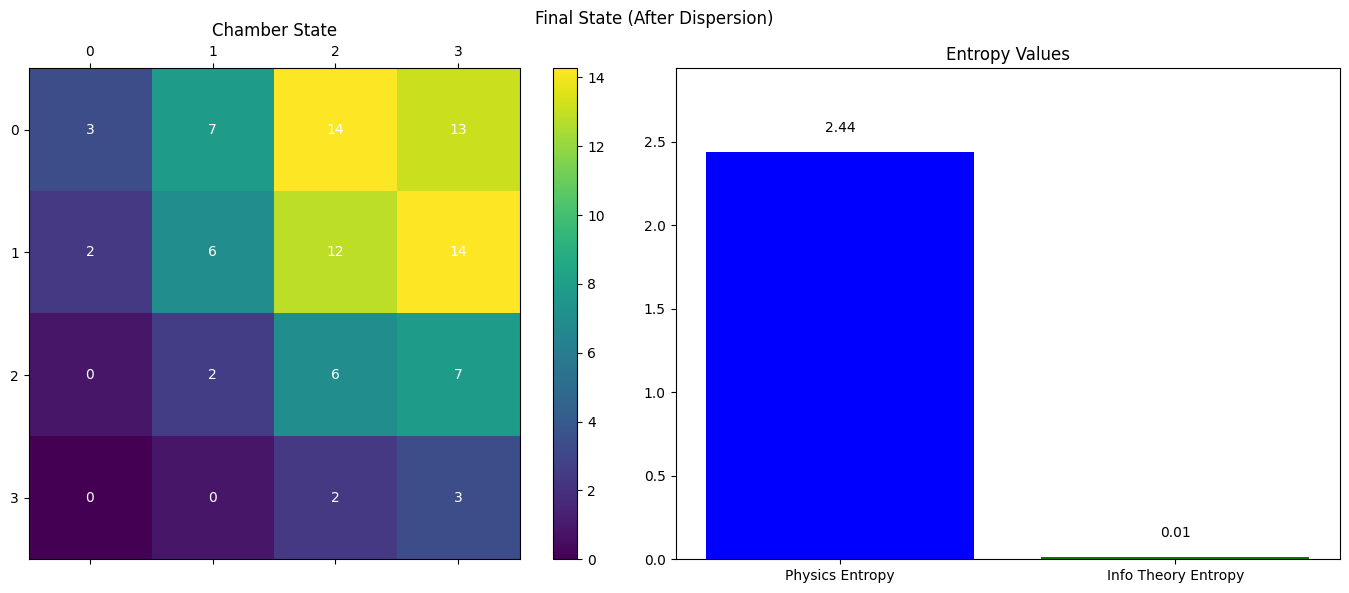

In [ ]:
# Visualize the chambers and their entropy values

visualize_chamber(final_chamber, "Final State (After Dispersion)")


**Left:** visualization of chamber. The numbers indicate how many molecules are in a call. There are 4x4 cells in all. The molecules are dispersed across the cells, with the exception of a few cells in the botthm left where there are no molecules.

**Right:** *In the final dispersed state of the chamber "Physics entropy" is **more** than "information theory  entropy"*

#### Why is one measure of entropy high while the other is low (and vice versa)?

Lets first look at what entropy is really capturing in Physics and in Information theory.

In "information theory",  entropy of an event captures the surprise value of an event. Low probability events have high surprise value and high probability events have low surprise value. We use a hypothetical simple distribution to capture this in the toy model, where a low probability value (high surprise value) is assigned to all molecules in a single cell of the chamber and a high probability (low surprise value) value otherwise.

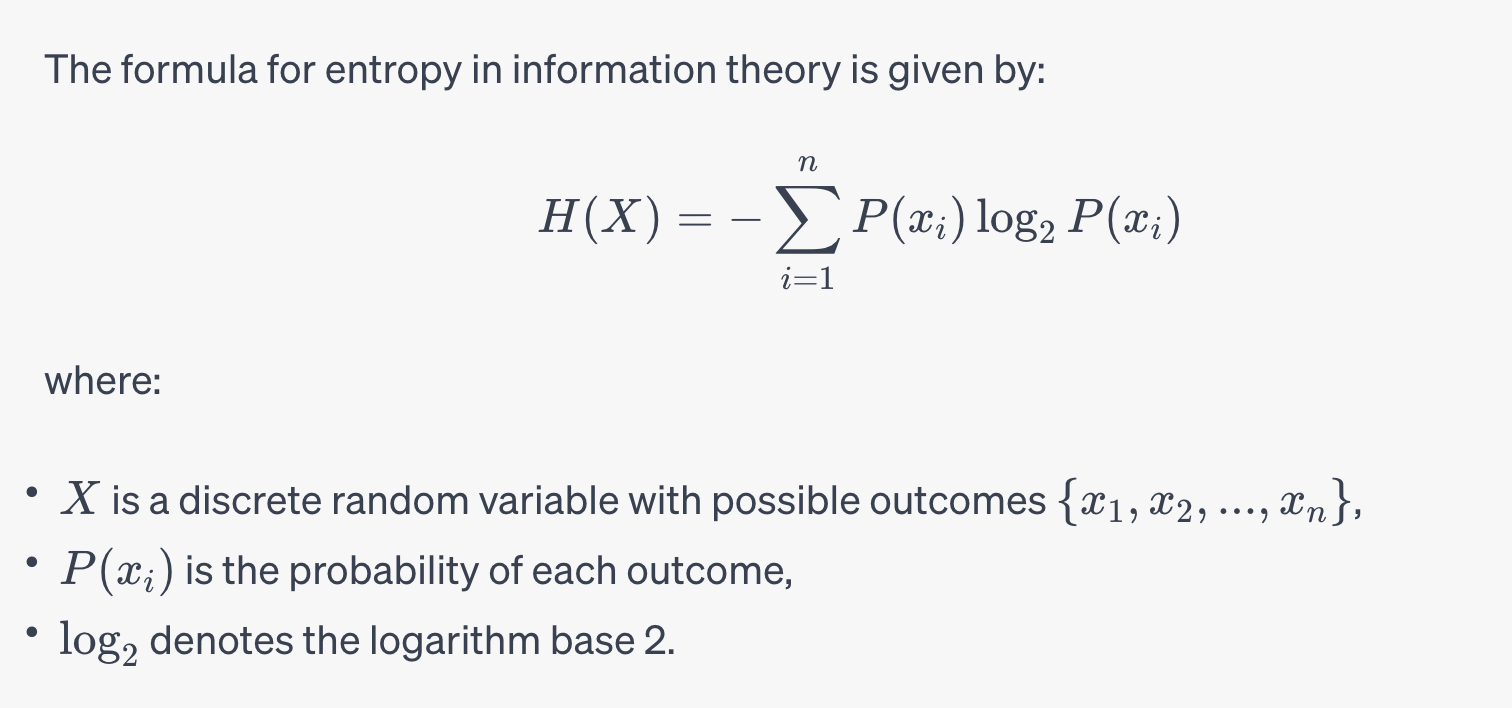

In physics, entropy is a measure of the number of possible arrangements a system can have - more the arrangements, higher the entropy. In the initial state, where all molecules are in a single cell, the system in a specific configuration - the probability of finding a molecule in that cell is 1 and 0 in all other cells. As the molecules disperse, there is a chance of every cell to have one or more molecules - so the entropy increases. We use the Gibbs entropy to capture "physics entropy" in our toy model *(see caveat below that comments on this choice)*

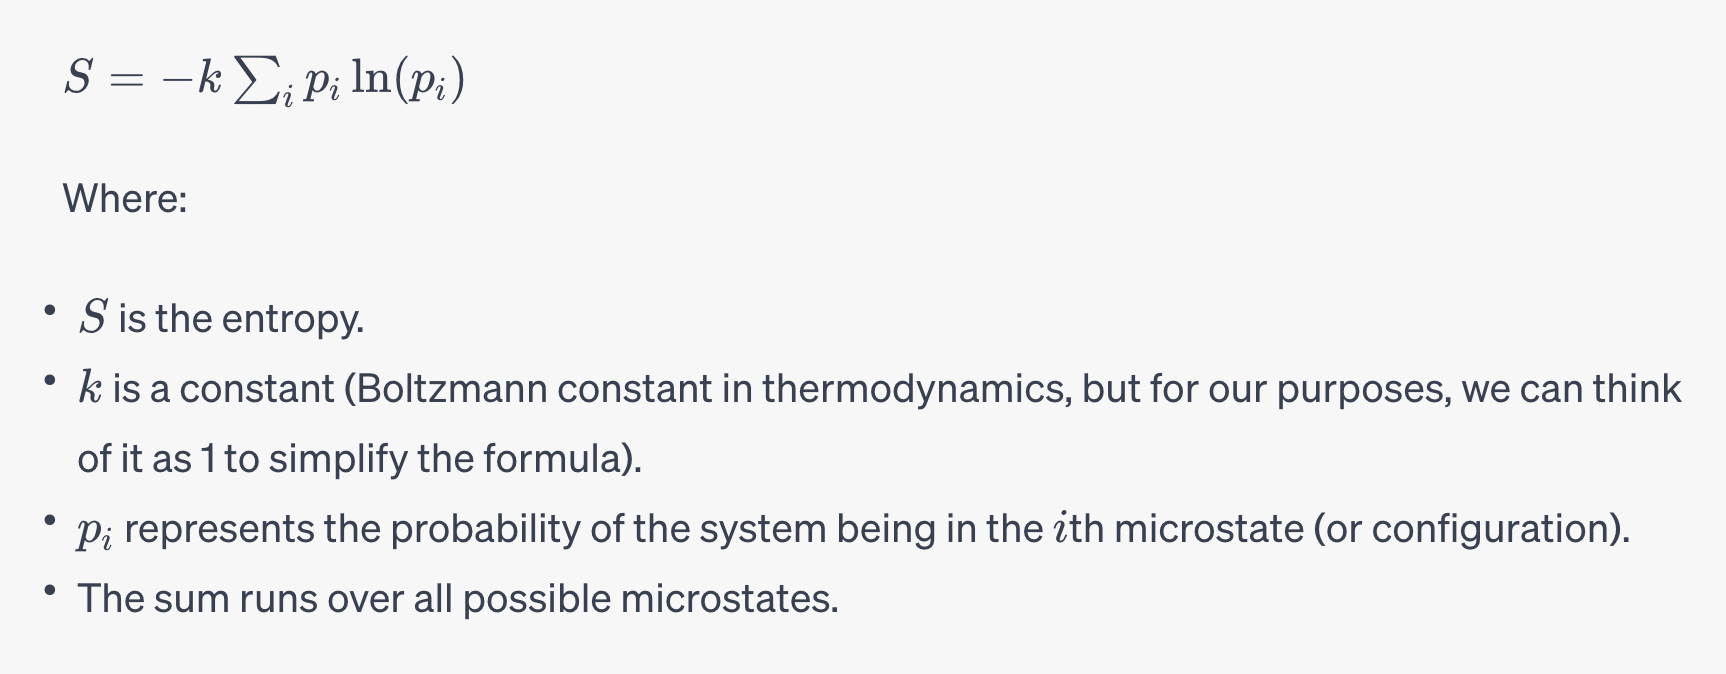

We see that both the entropy formulas have the same mathematical form *(barring the logarithm base and the constant)*. They are both sums of the negative logarithm of the probability of an event weighted by the probability of that event.

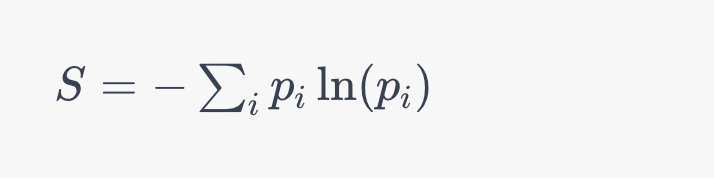

Yet we get completely different answers - when one is high in a state, the other is low and vice versa.

The reason is the what the probabilities are capturing

- In the case of physics, the probabilities reflect the likelihood of the system being in a particular microstate or configuration. Here, entropy measures the amount of disorder or the number of possible configurations consistent with a given macroscopic state. For our chamber example, when all particles are concentrated in one cell, it represents a very specific configuration, implying minimal disorder. Therefore, the entropy, which captures disorder, is low.

- In information theory, the probabilities represent the likelihood of observing a specific event from a set of possible events. Here, entropy quantifies the average "surprise" or uncertainty associated with these events. In the context of our chamber, the event where all particles are in a single cell is highly surprising because it's an unlikely occurrence, making its entropy high.

**Caveats**

 - When computing entropy for information theory, we are assigning probabilities to specific snapshot of the system, rather than the dynamic behavior of the molecules over time. This assigment of probabilities is contrived in a sense to illustrate the difference.

 - The statement, "If we examine the formula for computing entropy in Information theory and Physics, we see that both the entropy formulas, have the same mathematical form, other than the logarithm base and the constant," is oversimplified. While there is a similarity in the structure of the formulas (both involve summing over probabilities), the interpretation, and the way probabilities are determined, are very different. Also, in many physical systems, entropy calculations don't necessarily involve probabilities directly; instead, they might involve counting microstates or other methods, particularly in more advanced contexts.